Analysis of image factors on annotation consensus-- USFWS
Start date: 10/03/2023

In [1]:
#Imports
import pandas as pd
from PIL import Image
import os
import ast
import numpy as np

In [33]:
#Analysis annotations
path = "E:\\imagefactors\\data\\expertconsensusLabels_agreementIndex_Superclass.csv"
with open(path) as f:
  df = pd.read_csv(f)

#path = "E:\\imagefactors\\data\\expertconsensusLabels_agreementIndex_Spp.csv"
#with open(path) as f:
#  df = pd.read_csv(f)

#Fixing how bounding boxes are read for the analysis labels
def eval_bbox_refined(row):
    if pd.notnull(row['bbox']):
        return ast.literal_eval(row['bbox'])
    else:
        return None
# Apply the function to the 'bbox_refined' column and save the results
df['bbox'] = df.apply(eval_bbox_refined, axis=1)

df.head()

,Unnamed: 0,cluster_id,filename,consensus_class_ID,bbox,pielou_index
0,1,0,BDA_12C_20181127_1.JPG,Goose,"[4445.5, 2719.5, 95.0, 80.5]",0.000000
1,2,1,BDA_12C_20181127_1.JPG,Goose,"[4312.5, 2739.5, 98.0, 44.0]",0.468996
2,3,2,BDA_12C_20181127_1.JPG,Goose,"[3725.5, 1779.0, 73.5, 70.5]",0.468996
3,4,3,BDA_12C_20181127_1.JPG,Goose,"[3628.0, 1882.0, 92.0, 38.0]",0.000000
4,5,4,BDA_12C_20181127_1.JPG,Goose,"[3679.0, 1929.0, 65.0, 82.0]",0.000000


In [44]:
#IF RESUMING FROM A SAVED POINT
#path = "E:/imagefactors/data/expert_imagefactors_superclass.csv"
#with open(path) as f:
#  df = pd.read_csv(f)
  
path = "E:/imagefactors/data/expert_imagefactors_SPP.csv"
with open(path) as f:
  df = pd.read_csv(f)

#Fixing how bounding boxes are read for the analysis labels
def eval_bbox_refined(row):
    if pd.notnull(row['bbox']):
        return ast.literal_eval(row['bbox'])
    else:
        return None
# Apply the function to the 'bbox_refined' column and save the results
df['bbox'] = df.apply(eval_bbox_refined, axis=1)

In [34]:
#Calculate area of bboxes
def calc_area(row):
    bbox = row['bbox']
    xmin, ymin, w, h = bbox
    return w * h

df['area'] = df.apply(calc_area, axis=1)

In [35]:
# Define a function to calculate percentage area
def calculate_percentage_area(image_filename, bbox_area):
    image_path = os.path.join("E:\\imagefactors\\data\\usfws", image_filename)
    
    try:
        image = Image.open(image_path)
    except FileNotFoundError:
        # Handle the case where the image is not found
        print(f"Image not found: {image_path}")
        return None  # You can return a special value, such as None, to indicate the image wasn't found
    
    image_width, image_height = image.size
    image_area = image_width * image_height

    percentage_area = (bbox_area / image_area) * 100
    return percentage_area

# Calculate percentage area and add it as a new
df['bbox_percent_area'] = df.apply(lambda row: calculate_percentage_area(row['filename'], row['area']), axis=1)

df.head()

Image not found: E:\imagefactors\data\usfws\mxw_L13_20181215_1.JPG
Image not found: E:\imagefactors\data\usfws\mxw_L13_20181215_1.JPG
Image not found: E:\imagefactors\data\usfws\mxw_L13_20181215_1.JPG
Image not found: E:\imagefactors\data\usfws\mxw_L13_20181215_1.JPG
Image not found: E:\imagefactors\data\usfws\mxw_L13_20181215_1.JPG
Image not found: E:\imagefactors\data\usfws\mxw_L13_20181215_1.JPG
Image not found: E:\imagefactors\data\usfws\mxw_L13_20181215_1.JPG
Image not found: E:\imagefactors\data\usfws\mxw_L13_20181215_1.JPG
Image not found: E:\imagefactors\data\usfws\mxw_L13_20181215_1.JPG
Image not found: E:\imagefactors\data\usfws\mxw_L13_20181215_1.JPG
Image not found: E:\imagefactors\data\usfws\mxw_L13_20181215_1.JPG
Image not found: E:\imagefactors\data\usfws\mxw_L13_20181215_1.JPG
Image not found: E:\imagefactors\data\usfws\mxw_L13_20181215_1.JPG
Image not found: E:\imagefactors\data\usfws\mxw_L13_20181215_1.JPG
Image not found: E:\imagefactors\data\usfws\mxw_L13_20181215_1

,Unnamed: 0,cluster_id,filename,consensus_class_ID,bbox,pielou_index,area,bbox_percent_area
0,1,0,BDA_12C_20181127_1.JPG,Goose,"[4445.5, 2719.5, 95.0, 80.5]",0.000000,7647.50,0.038311
1,2,1,BDA_12C_20181127_1.JPG,Goose,"[4312.5, 2739.5, 98.0, 44.0]",0.468996,4312.00,0.021601
2,3,2,BDA_12C_20181127_1.JPG,Goose,"[3725.5, 1779.0, 73.5, 70.5]",0.468996,5181.75,0.025958
3,4,3,BDA_12C_20181127_1.JPG,Goose,"[3628.0, 1882.0, 92.0, 38.0]",0.000000,3496.00,0.017513
4,5,4,BDA_12C_20181127_1.JPG,Goose,"[3679.0, 1929.0, 65.0, 82.0]",0.000000,5330.00,0.026701


In [36]:
# % of targets of the same class in the same image, as the analysis target

# Define a function to calculate the percentage of same-class neighbors for a given row
def calculate_same_class_percentage(row, df):
    # Get the filename and class ID of the target bounding box
    filename = row['filename']
    class_id = row['consensus_class_ID']
    
    # Filter the DataFrame to include only rows with matching filenames
    matching_rows = df[df['filename'] == filename]
    
    # Calculate the total number of neighbors in the same image
    total_neighbors = len(matching_rows) - 1  # Subtract 1 to exclude the target bounding box
    
    if total_neighbors == 0:
        return 0  # Avoid division by zero
    
    # Calculate the number of same-class neighbors
    same_class_neighbors = len(matching_rows[matching_rows['consensus_class_ID'] == class_id]) - 1  # Subtract 1 to exclude the target bounding box
    
    # Calculate the percentage of same-class neighbors
    same_class_percentage = (same_class_neighbors / total_neighbors) * 100
    
    return same_class_percentage

# Calculate the same-class percentage for each row and add the results as a new column
df['same_class_percent'] = df.apply(lambda row: calculate_same_class_percentage(row, df), axis=1)

In [37]:
#How many neighbors for each annotation?

# Define a function to calculate the number of neighbors for a given row
def count_neighbors(row, df):
    # Extract 'bbox' values from the 'consensus_bbox' column as a list [xmin, ymin, width, height]
    bbox = row['bbox']  # Use ast.literal_eval() to safely evaluate the string
    
    # Define the search radius as 2 times the maximum of width and height
    search_radius = 2 * max(bbox[2], bbox[3])
    
    # Calculate the center coordinates of the bounding box
    x_center = bbox[0] + bbox[2] / 2
    y_center = bbox[1] + bbox[3] / 2
    
    # Initialize a count for neighbors
    num_neighbors = 0
    
    # Iterate through rows with matching filenames
    matching_rows = df[df['filename'] == row['filename']]
    
    for _, neighbor_row in matching_rows.iterrows():
        if neighbor_row.name != row.name:
            # Extract 'bbox' values for the neighbor as a list [xmin, ymin, width, height]
            neighbor_bbox = neighbor_row['bbox']
            
            # Calculate the center coordinates of the potential neighbor
            neighbor_x_center = neighbor_bbox[0] + neighbor_bbox[2] / 2
            neighbor_y_center = neighbor_bbox[1] + neighbor_bbox[3] / 2
            
            # Calculate the Euclidean distance between centers
            distance = np.sqrt((x_center - neighbor_x_center)**2 + (y_center - neighbor_y_center)**2)
            
            # Check if the neighbor is within the search radius
            if distance <= search_radius:
                num_neighbors += 1
    
    return num_neighbors

# Calculate the number of neighbors for each row and add the results as a new column
df['num_neighbors'] = df.apply(lambda row: count_neighbors(row, df), axis=1)

df.head()

,Unnamed: 0,cluster_id,filename,consensus_class_ID,bbox,pielou_index,area,bbox_percent_area,same_class_percent,num_neighbors
0,1,0,BDA_12C_20181127_1.JPG,Goose,"[4445.5, 2719.5, 95.0, 80.5]",0.000000,7647.50,0.038311,54.878049,1
1,2,1,BDA_12C_20181127_1.JPG,Goose,"[4312.5, 2739.5, 98.0, 44.0]",0.468996,4312.00,0.021601,54.878049,2
2,3,2,BDA_12C_20181127_1.JPG,Goose,"[3725.5, 1779.0, 73.5, 70.5]",0.468996,5181.75,0.025958,54.878049,1
3,4,3,BDA_12C_20181127_1.JPG,Goose,"[3628.0, 1882.0, 92.0, 38.0]",0.000000,3496.00,0.017513,54.878049,3
4,5,4,BDA_12C_20181127_1.JPG,Goose,"[3679.0, 1929.0, 65.0, 82.0]",0.000000,5330.00,0.026701,54.878049,3


In [38]:
#Add in AGL/GSD info derived from derive_agl_gsd.ipynb
path1 = "E:\\imagefactors\\data\\benchmark_gsd.csv"
with open(path1) as f1:
  gsd_df = pd.read_csv(f1)

merged_df = pd.merge(df, gsd_df, on="filename", how="left")
merged_df = merged_df[merged_df["filename"] != "mxw_L13_20181215_1.JPG"]
merged_df.tail()

,Unnamed: 0,cluster_id,filename,consensus_class_ID,bbox,pielou_index,area,bbox_percent_area,same_class_percent,num_neighbors,agl,gsd
2200,2343,79,BDA_18A4_20181107_4.JPG,Duck,"[802.5, 1579.5, 69.5, 71.5]",0.0,4969.25,0.024894,73.493976,0,19.9,0.449756
2201,2344,80,BDA_18A4_20181107_4.JPG,Crane,"[1129.5, 2026.5, 147.5, 183.5]",0.0,27066.25,0.135590,25.301205,1,19.9,0.449756
2202,2345,81,BDA_18A4_20181107_4.JPG,Crane,"[395.0, 2801.0, 154.0, 121.5]",0.0,18711.00,0.093734,25.301205,1,19.9,0.449756
2203,2346,82,BDA_18A4_20181107_4.JPG,Crane,"[4903.0, 3153.0, 289.0, 116.0]",0.0,33524.00,0.167940,25.301205,0,19.9,0.449756
2204,2347,83,BDA_18A4_20181107_4.JPG,Duck,"[3485.5, 1717.5, 70.5, 98.0]",0.0,6909.00,0.034611,73.493976,4,19.9,0.449756


In [39]:
#Distance from image center

# Function to calculate distance from center
def calculate_distance_from_center(row):
    image_path = os.path.join("E:\\imagefactors\\data\\usfws", row["filename"])
    
    try:
        image = Image.open(image_path)
    except FileNotFoundError:
        # Handle the case where the image is not found
        print(f"Image not found: {image_path}")
        return None  # You can return a special value, such as None, to indicate the image wasn't found
    
    image_width, image_height = image.size
    center_x_px = image_width/2 
    center_y_px = image_height/2
    gsd_m = row['gsd'] / 100

    row['center_x_m'] = center_x_px * gsd_m
    row['center_y_m'] = center_y_px * gsd_m
    
    # Get the coordinates of the bounding box (x, y, width, height)
    x, y, width, height = row['bbox']

    # Calculate the center point of the bounding box in pixels
    bbox_center_x_px = x + (width / 2)
    bbox_center_y_px = y + (height / 2)

    # Calculate the center point of the bounding box in meters
    bbox_center_x_m = bbox_center_x_px * gsd_m
    bbox_center_y_m = bbox_center_y_px * gsd_m

    # Calculate the distance from the center of the image in meters
    distance_m = ((row['center_x_m'] - bbox_center_x_m)**2 + (row['center_y_m'] - bbox_center_y_m)**2)**0.5

    return distance_m

# Apply the function to the merged dataframe
merged_df['distance_from_center'] = merged_df.apply(calculate_distance_from_center, axis=1)
merged_df.head()

,Unnamed: 0,cluster_id,filename,consensus_class_ID,bbox,pielou_index,area,bbox_percent_area,same_class_percent,num_neighbors,agl,gsd,distance_from_center
0,1,0,BDA_12C_20181127_1.JPG,Goose,"[4445.5, 2719.5, 95.0, 80.5]",0.000000,7647.50,0.038311,54.878049,1,41.27,0.932734,18.567453
1,2,1,BDA_12C_20181127_1.JPG,Goose,"[4312.5, 2739.5, 98.0, 44.0]",0.468996,4312.00,0.021601,54.878049,2,41.27,0.932734,17.502523
2,3,2,BDA_12C_20181127_1.JPG,Goose,"[3725.5, 1779.0, 73.5, 70.5]",0.468996,5181.75,0.025958,54.878049,1,41.27,0.932734,9.572619
3,4,3,BDA_12C_20181127_1.JPG,Goose,"[3628.0, 1882.0, 92.0, 38.0]",0.000000,3496.00,0.017513,54.878049,3,41.27,0.932734,8.778478
4,5,4,BDA_12C_20181127_1.JPG,Goose,"[3679.0, 1929.0, 65.0, 82.0]",0.000000,5330.00,0.026701,54.878049,3,41.27,0.932734,9.200167


In [45]:
df['density'] = df.groupby('filename')['bbox'].transform('count')
df.head()

,Unnamed: 0,cluster_id,filename,consensus_class_ID,bbox,pielou_index,area,bbox_percent_area,same_class_percent,num_neighbors,agl,gsd,distance_from_center,density
0,1,0,BDA_12C_20181127_1.JPG,Canadian Goose,"[4445.5, 2719.5, 95.0, 80.5]",0.000000,7647.50,0.038311,54.878049,1,41.27,0.932734,18.567453,83
1,2,1,BDA_12C_20181127_1.JPG,Canadian Goose,"[4312.5, 2739.5, 98.0, 44.0]",0.468996,4312.00,0.021601,54.878049,2,41.27,0.932734,17.502523,83
2,3,2,BDA_12C_20181127_1.JPG,Canadian Goose,"[3725.5, 1779.0, 73.5, 70.5]",0.468996,5181.75,0.025958,54.878049,1,41.27,0.932734,9.572619,83
3,4,3,BDA_12C_20181127_1.JPG,Canadian Goose,"[3628.0, 1882.0, 92.0, 38.0]",0.000000,3496.00,0.017513,54.878049,3,41.27,0.932734,8.778478,83
4,5,4,BDA_12C_20181127_1.JPG,Canadian Goose,"[3679.0, 1929.0, 65.0, 82.0]",0.000000,5330.00,0.026701,54.878049,3,41.27,0.932734,9.200167,83


In [48]:
class_counts = df['consensus_class_ID'].value_counts()

# Create a dictionary to map class IDs to their prevalence percentages
class_prevalence = (class_counts / len(df)) * 100

# Add a new 'rarity' column by mapping class IDs to their prevalence percentages
df['rarity'] = df['consensus_class_ID'].map(class_prevalence)
df.head()

,Unnamed: 0,cluster_id,filename,consensus_class_ID,bbox,pielou_index,area,bbox_percent_area,same_class_percent,num_neighbors,agl,gsd,distance_from_center,density,rarity
0,1,0,BDA_12C_20181127_1.JPG,Canadian Goose,"[4445.5, 2719.5, 95.0, 80.5]",0.000000,7647.50,0.038311,54.878049,1,41.27,0.932734,18.567453,83,4.716553
1,2,1,BDA_12C_20181127_1.JPG,Canadian Goose,"[4312.5, 2739.5, 98.0, 44.0]",0.468996,4312.00,0.021601,54.878049,2,41.27,0.932734,17.502523,83,4.716553
2,3,2,BDA_12C_20181127_1.JPG,Canadian Goose,"[3725.5, 1779.0, 73.5, 70.5]",0.468996,5181.75,0.025958,54.878049,1,41.27,0.932734,9.572619,83,4.716553
3,4,3,BDA_12C_20181127_1.JPG,Canadian Goose,"[3628.0, 1882.0, 92.0, 38.0]",0.000000,3496.00,0.017513,54.878049,3,41.27,0.932734,8.778478,83,4.716553
4,5,4,BDA_12C_20181127_1.JPG,Canadian Goose,"[3679.0, 1929.0, 65.0, 82.0]",0.000000,5330.00,0.026701,54.878049,3,41.27,0.932734,9.200167,83,4.716553


In [46]:
#Temporary save progress-- still need to calculate image texture
#df.to_csv('E:/imagefactors/data/expert_imagefactors_superclass.csv', index=False)
df.to_csv('E:/imagefactors/data/expert_imagefactors_SPP.csv', index=False)

In [104]:
import os
import cv2
import pandas as pd
from skimage.feature import graycomatrix, graycoprops
import numpy as np
import ast

def calculate_gclm_derivatives(image, bbox):
    # Convert bounding box coordinates to integers
    x, y, width, height = map(int, bbox)
    
    # Extract the region of interest (ROI) from the image using the bounding box
    roi = image[y:y+height, x:x+width]
    
    # Convert the ROI to grayscale
    roi_gray = cv2.cvtColor(roi, cv2.COLOR_RGB2GRAY)
    
    # Calculate GCLM features for the grayscale ROI
    distances = [1, 2]  # Define the distances for GCLM
    angles = [0, np.pi/4, np.pi/2, 3*np.pi/4]  # Define the angles for GCLM
    gclm = graycomatrix(roi_gray, distances=distances, angles=angles, levels=256,
                        symmetric=True, normed=True)
    
    # Calculate GCLM derivatives (contrast, dissimilarity, homogeneity, energy)
    contrast = graycoprops(gclm, 'contrast').mean()
    dissimilarity = graycoprops(gclm, 'dissimilarity').mean()
    homogeneity = graycoprops(gclm, 'homogeneity').mean()
    energy = graycoprops(gclm, 'energy').mean()
    
    return contrast, dissimilarity, homogeneity, energy

def calculate_texture_metrics_for_csv(image_path, csv_file):
        # Load the image
        image = cv2.imread(image_path)
        
        # Read the CSV file
        csv_data = pd.read_csv(csv_file)
        
        # Find the corresponding image filename
        image_filename = os.path.basename(image_path)
        
        # Filter annotations based on the image filename
        annotations = csv_data[csv_data['filename'] == image_filename]
        
        # Initialize lists to store the texture metrics
        bbox_contrast_list = []
        bbox_dissimilarity_list = []
        bbox_homogeneity_list = []
        bbox_energy_list = []
        donut_contrast_list = []
        donut_dissimilarity_list = []
        donut_homogeneity_list = []
        donut_energy_list = []
        
        # Iterate through annotations and calculate texture metrics
        for _, row in annotations.iterrows():
            bbox = ast.literal_eval(row['consensus_bbox'])  # Parse bbox values from string to list
            
            # Calculate GCLM derivatives for bounding box and donut region
            bbox_contrast, bbox_dissimilarity, bbox_homogeneity, bbox_energy = calculate_gclm_derivatives(image, bbox)
            
            donut_left = max(0, bbox[0] - 20)  # Adjust the buffer size as needed
            donut_top = max(0, bbox[1] - 20)
            donut_right = min(image.shape[1], bbox[0] + bbox[2] + 20)
            donut_bottom = min(image.shape[0], bbox[1] + bbox[3] + 20)
            donut_bbox = [donut_left, donut_top, donut_right - donut_left, donut_bottom - donut_top]
            donut_contrast, donut_dissimilarity, donut_homogeneity, donut_energy = calculate_gclm_derivatives(image, donut_bbox)
            
            # Append the calculated texture metrics to the lists
            bbox_contrast_list.append(bbox_contrast)
            bbox_dissimilarity_list.append(bbox_dissimilarity)
            bbox_homogeneity_list.append(bbox_homogeneity)
            bbox_energy_list.append(bbox_energy)
            
            donut_contrast_list.append(donut_contrast)
            donut_dissimilarity_list.append(donut_dissimilarity)
            donut_homogeneity_list.append(donut_homogeneity)
            donut_energy_list.append(donut_energy)
        
        # Add texture metrics as new columns in the dataframe
        annotations['bbox_contrast'] = bbox_contrast_list
        annotations['bbox_dissimilarity'] = bbox_dissimilarity_list
        annotations['bbox_homogeneity'] = bbox_homogeneity_list
        annotations['bbox_energy'] = bbox_energy_list
        
        annotations['donut_contrast'] = donut_contrast_list
        annotations['donut_dissimilarity'] = donut_dissimilarity_list
        annotations['donut_homogeneity'] = donut_homogeneity_list
        annotations['donut_energy'] = donut_energy_list
        
        # Save the modified dataframe if needed
        annotations.to_csv('E:\\imagefactors\\data\\gclm.csv', index=False)
    
# Example usage
image_path = 'E:\\imagefactors\\data\\zooniverse\\20211212_Alameda_0285_07_08.png'
csv_file = path  # Replace with the actual path to your CSV file containing the annotations

calculate_texture_metrics_for_csv(image_path, csv_file)

C:\Users\rconverse\AppData\Local\Temp\ipykernel_7096\1269721627.py:81: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  annotations['bbox_contrast'] = bbox_contrast_list
C:\Users\rconverse\AppData\Local\Temp\ipykernel_7096\1269721627.py:82: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  annotations['bbox_dissimilarity'] = bbox_dissimilarity_list
C:\Users\rconverse\AppData\Local\Temp\ipykernel_7096\1269721627.py:83: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try u

In [105]:
import os
import cv2
import pandas as pd
from skimage.feature import graycomatrix, graycoprops
import numpy as np
import ast

def calculate_gclm_derivatives(image, bbox):
    # Convert bounding box coordinates to integers
    x, y, width, height = map(int, bbox)
    
    # Extract the region of interest (ROI) from the image using the bounding box
    roi = image[y:y+height, x:x+width]
    
    # Check if the ROI is empty or None
    if roi is None or roi.size == 0:
        print("Warning: ROI is empty or None")
        return None, None, None, None
    
    # Convert the ROI to grayscale
    roi_gray = cv2.cvtColor(roi, cv2.COLOR_BGR2GRAY)
    
    # Calculate GCLM features for the grayscale ROI
    distances = [1, 2]  # Define the distances for GCLM
    angles = [0, np.pi/4, np.pi/2, 3*np.pi/4]  # Define the angles for GCLM
    gclm = graycomatrix(roi_gray, distances=distances, angles=angles, levels=256,
                        symmetric=True, normed=True)
    
    # Calculate GCLM derivatives (contrast, dissimilarity, homogeneity, energy)
    contrast = graycoprops(gclm, 'contrast').mean()
    dissimilarity = graycoprops(gclm, 'dissimilarity').mean()
    homogeneity = graycoprops(gclm, 'homogeneity').mean()
    energy = graycoprops(gclm, 'energy').mean()
    
    return contrast, dissimilarity, homogeneity, energy

def calculate_texture_metrics_for_directory(image_dir, csv_file):
    # Initialize an empty dataframe to store the texture metrics
    texture_metrics_df = pd.DataFrame()
    
    # List all files in the specified directory
    image_files = [f for f in os.listdir(image_dir) if os.path.isfile(os.path.join(image_dir, f))]
    
    for image_file in image_files:
        try:
            # Construct the full path to the image file
            image_path = os.path.join(image_dir, image_file)
            
            # Load the image
            image = cv2.imread(image_path)
            
            if image is None:
                print(f"Warning: Image '{image_path}' not found or cannot be loaded.")
                continue
            
            # Read the CSV file
            csv_data = pd.read_csv(csv_file)
            
            # Find the corresponding image filename
            image_filename = os.path.basename(image_path)
            
            # Filter annotations based on the image filename
            annotations = csv_data[csv_data['filename'] == image_filename]
            
            # Initialize lists to store the texture metrics
            bbox_contrast_list = []
            bbox_dissimilarity_list = []
            bbox_homogeneity_list = []
            bbox_energy_list = []
            donut_contrast_list = []
            donut_dissimilarity_list = []
            donut_homogeneity_list = []
            donut_energy_list = []
            
            # Iterate through annotations and calculate texture metrics
            for _, row in annotations.iterrows():
                bbox = ast.literal_eval(row['consensus_bbox'])  # Parse bbox values from string to list
                
                # Calculate GCLM derivatives for bounding box and donut region
                bbox_contrast, bbox_dissimilarity, bbox_homogeneity, bbox_energy = calculate_gclm_derivatives(image, bbox)
                
                donut_left = max(0, bbox[0] - 20)  # Adjust the buffer size as needed
                donut_top = max(0, bbox[1] - 20)
                donut_right = min(image.shape[1], bbox[0] + bbox[2] + 20)
                donut_bottom = min(image.shape[0], bbox[1] + bbox[3] + 20)
                donut_bbox = [donut_left, donut_top, donut_right - donut_left, donut_bottom - donut_top]
                donut_contrast, donut_dissimilarity, donut_homogeneity, donut_energy = calculate_gclm_derivatives(image, donut_bbox)
                
                # Append the calculated texture metrics to the lists
                bbox_contrast_list.append(bbox_contrast)
                bbox_dissimilarity_list.append(bbox_dissimilarity)
                bbox_homogeneity_list.append(bbox_homogeneity)
                bbox_energy_list.append(bbox_energy)
                
                donut_contrast_list.append(donut_contrast)
                donut_dissimilarity_list.append(donut_dissimilarity)
                donut_homogeneity_list.append(donut_homogeneity)
                donut_energy_list.append(donut_energy)
            
            # Add texture metrics as columns to a temporary dataframe
            temp_df = pd.DataFrame({
                'filename': [image_filename] * len(annotations),
                'bbox_contrast': bbox_contrast_list,
                'bbox_dissimilarity': bbox_dissimilarity_list,
                'bbox_homogeneity': bbox_homogeneity_list,
                'bbox_energy': bbox_energy_list,
                'donut_contrast': donut_contrast_list,
                'donut_dissimilarity': donut_dissimilarity_list,
                'donut_homogeneity': donut_homogeneity_list,
                'donut_energy': donut_energy_list
            })
            
            # Append the temporary dataframe to the main dataframe
            texture_metrics_df = pd.concat([texture_metrics_df, temp_df], ignore_index=True)
        except Exception as e:
            print(f"Error processing image '{image_path}': {e}")
    
    # Save the main dataframe with texture metrics to a CSV file
    texture_metrics_df.to_csv('E:\\imagefactors\\data\\gclm.csv', index=False)

# Example usage with a directory containing images
image_dir = 'E:\\imagefactors\\data\\zooniverse'
csv_file = path  # Replace with the actual path to your CSV file containing the annotations

calculate_texture_metrics_for_directory(image_dir, csv_file)

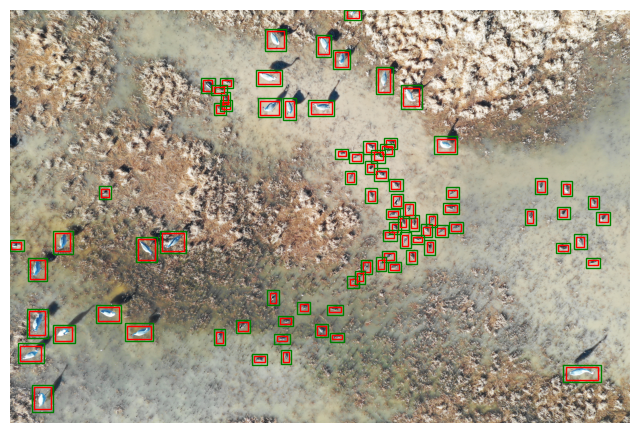

In [14]:
#Sample visualization of donut + bounding boxes just to make sure it all looks good

import os
import cv2
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle

def visualize_bounding_boxes_with_donuts(image_path, csv_file):
    # Load the image
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert from BGR to RGB
    
    # Read the CSV file
    csv_data = pd.read_csv(csv_file)
    
    # Find the corresponding image filename
    image_filename = os.path.basename(image_path)
    
    # Filter annotations based on the image filename
    annotations = csv_data[csv_data['filename'] == image_filename]
    
    # Plot the image with bounding boxes and donut regions
    fig, ax = plt.subplots(figsize=(8, 8))
    ax.imshow(image)
    ax.axis('off')
    
    # Iterate through annotations and draw bounding boxes and donut regions
    for _, row in annotations.iterrows():
        bbox = ast.literal_eval(row['bbox'])  # Parse bbox values from string to list
        #bbox = row['bbox']
        # Draw bounding box
        rectangle = Rectangle((bbox[0], bbox[1]), bbox[2], bbox[3], linewidth=1, edgecolor='r', facecolor='none')
        ax.add_patch(rectangle)
        
        # Draw donut region
        donut_left = max(0, bbox[0] - 20)  # Adjust the buffer size as needed
        donut_top = max(0, bbox[1] - 20)
        donut_right = min(image.shape[1], bbox[0] + bbox[2] + 20)
        donut_bottom = min(image.shape[0], bbox[1] + bbox[3] + 20)
        donut_rectangle = Rectangle((donut_left, donut_top), (donut_right - donut_left),
                                   (donut_bottom - donut_top), linewidth=1, edgecolor='g', facecolor='none')
        ax.add_patch(donut_rectangle)
    
    # Show the plot
    plt.show()

# Example usage
image_path = 'E:\\imagefactors\\data\\usfws\\BDA_18A4_20181107_4.JPG'
csv_file = path

visualize_bounding_boxes_with_donuts(image_path, csv_file)